## Supervised: Linear Regression

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
USAhousing = pd.read_csv('/content/USA_Housing.csv')
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]
y = USAhousing['Price']

USAhousing.head(3)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3000, 5), (3000,), (2000, 5), (2000,))

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
print("y_pred.shape:", y_pred.shape)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

y_pred.shape: (2000,)
MAE: 82288.22251914942
MSE: 10460958907.208977
RMSE: 102278.82922290897


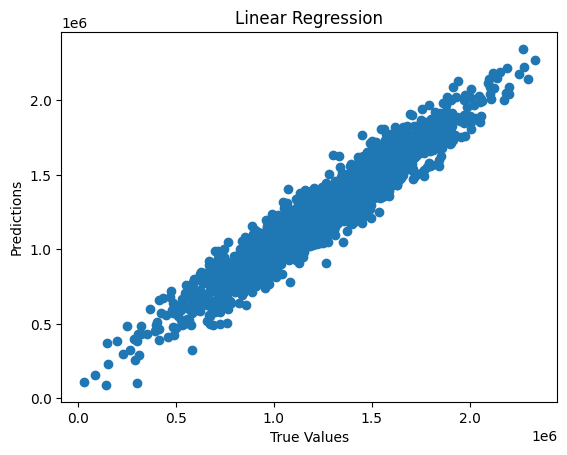

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression')
plt.show()

## Unsupervised: K-Means Clustering

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784')

In [ ]:
X = mnist.data.astype(np.float32)
y = mnist.target.astype(int)
X /= 255.0

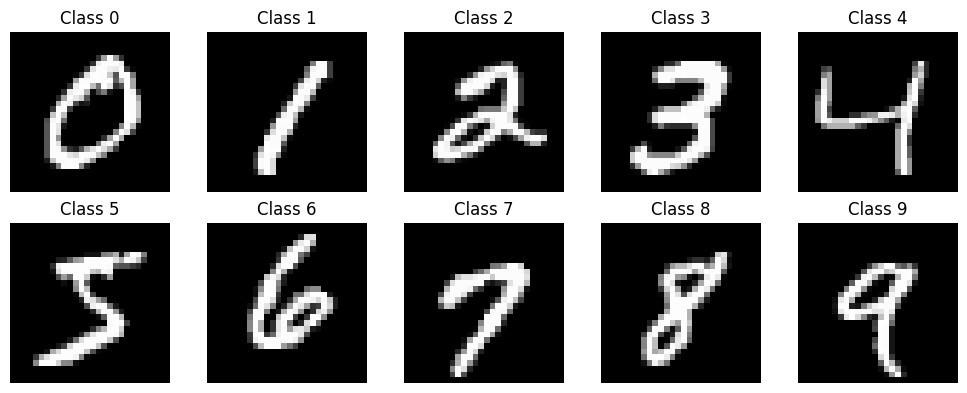

In [ ]:
examples = {}
for i in range(10):
    examples[i] = X[y == i].to_numpy()[0].reshape(28, 28)

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(examples[i], cmap='gray')
    plt.title(f'Class {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import PCA 

pca = PCA(2)
X_pca = pca.fit_transform(X)

print("Before PCA", X.shape)
print("After PCA", X_pca.shape)

Before PCA (70000, 784)
After PCA (70000, 2)


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_pca)
clusters = kmeans.predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


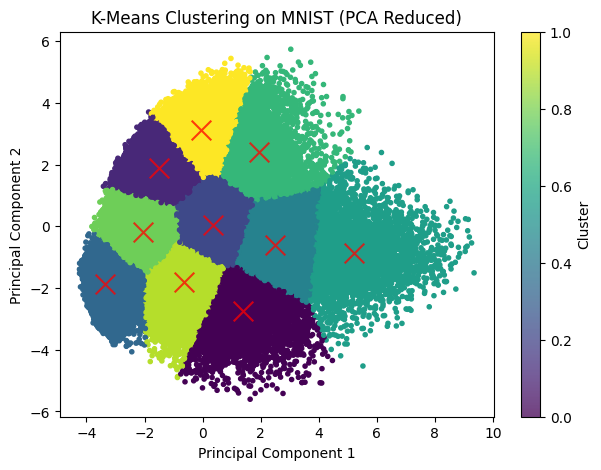

In [ ]:
centers = kmeans.cluster_centers_
plt.figure(figsize=(7, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='.')
scatter = plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title('K-Means Clustering on MNIST (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()